Figure-SI5.ipynb
------------------------------------------------------------------------------
Purpose:  
- Generate Figure SI5 (panels A - D) illustrating data quality for our US sample (pings per trip, pings per day, time between pings, trips per day), by our various filters. 

Usage:
- Change fp variable to replication filepath.
- Run all cells.
  
Requirements:
- Python 3
- Packages: matplotlib 3.9.2, pandas 2.2.2, numpy 1.26.4

Inputs:
- trips_per_day (produced on Spectus platform using process_trips_into_outputs_us.ipynb)
- pings_per_day (produced on Spectus platform using process_trips_into_outputs_us.ipynb)
- pings_per_trip (produced on Spectus platform using process_trips_into_outputs_us.ipynb)
- trips_per_day (produced on Spectus platform using process_trips_into_outputs_us.ipynb)

Outputs:
- figures/figSI5.png


In [14]:
fp = '../'
fp_input = fp + 'data/sample_statistics/'
fp_output = fp + 'figures/'


In [15]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Helvetica'
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


### Define helper functions.

In [16]:
def read_orc(fp):
    if fp[-1] != '/':
        fp += '/'
    files = os.listdir(fp)
    dfs = []
    for file in files:
        dfs.append(pd.read_orc(fp+file))
    return pd.concat(dfs)


### Read in data.

In [17]:
trips_per_day = read_orc(f'{fp_input}trips_per_day/')
pings_per_day = read_orc(f'{fp_input}pings_per_day/')
pings_per_trip = read_orc(f'{fp_input}pings_per_trip/')
ping_time = read_orc(f'{fp_input}ping_time/')

ping_time_all = ping_time.pivot(columns={'filter'},index='ping_time',values='users').rename(columns={i:f'users{i}' for i in range(1,5)}).reset_index()
trips_pd_all = trips_per_day.pivot(columns={'filter'},index='trips_per_day',values='users').rename(columns={i:f'users{i}' for i in range(1,5)}).reset_index().sort_values('trips_per_day')
pings_pt_all = pings_per_trip.pivot(columns={'filter'},index='pings_per_trip',values='users').rename(columns={i:f'users{i}' for i in range(1,5)}).reset_index().sort_values('pings_per_trip')
pings_pd_all = pings_per_day.pivot(columns={'filter'},index='pings_per_day',values='users').rename(columns={i:f'users{i}' for i in range(1,5)}).reset_index().sort_values('pings_per_day')

ping_time_all = ping_time_all.sort_values('ping_time')
pings_pt_all = pings_pt_all.sort_values('pings_per_trip')
pings_pd_all = pings_pd_all.sort_values('pings_per_day')
trips_pd_all = trips_pd_all.sort_values('trips_per_day')

trips_pd_all = trips_pd_all.sort_values('trips_per_day')
trips_pd_all['trips_per_day_rdd'] = np.ceil(trips_pd_all.trips_per_day)
trips_pd_all_rdd = trips_pd_all.groupby('trips_per_day_rdd').agg({f'users{i}':'sum' for i in range(1,5)}).reset_index()

### Create figure.

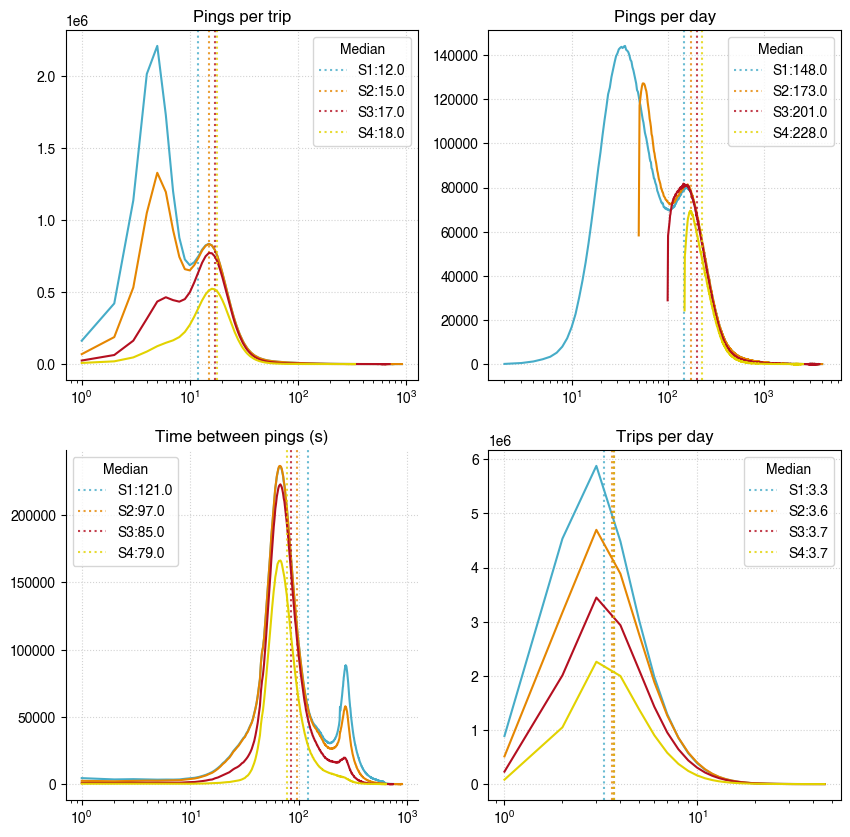

In [18]:
colors = ['#46ACC8','#E58601','#B40F20','#e2d200']
fig,axs = plt.subplots(2,2,figsize=(10,10))
ax1 = axs[0,0]
ax2 = axs[0,1]
ax3 = axs[1,0]
ax4 = axs[1,1]
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax4.set_xscale('log')

ax1.grid(linestyle='dotted',color='lightgrey')
ax2.grid(linestyle='dotted',color='lightgrey')
ax3.grid(linestyle='dotted',color='lightgrey')
ax4.grid(linestyle='dotted',color='lightgrey')
# cs_rearr = [cs[2],cs[3],cs[1],cs[0]]

for i in range(1,5):
    pings_pt_all['users_cumul'] = pings_pt_all[f'users{i}'].cumsum()/pings_pt_all[f'users{i}'].sum()
    med = pings_pt_all[pings_pt_all.users_cumul>.5].pings_per_trip.values[0]
    ax1.axvline(med,label=f'S{i}:{np.round(med,2):.1f}',linestyle=':',alpha=.8,color=colors[i-1])
    ax1.plot(pings_pt_all.pings_per_trip,pings_pt_all[f'users{i}'],color=colors[i-1])
    ax1.set_title('Pings per trip')
    ax1.legend(title='Median')

    ax2.plot(pings_pd_all.pings_per_day,pings_pd_all[f'users{i}'],color=colors[i-1])
    pings_pd_all['users_cumul'] = pings_pd_all[f'users{i}'].cumsum()/pings_pd_all[f'users{i}'].sum()
    med = pings_pd_all[pings_pd_all.users_cumul>.5].pings_per_day.values[0]
    ax2.axvline(med,label=f'S{i}:{np.round(med,2):.1f}',linestyle=':',alpha=.8,color=colors[i-1])
    ax2.set_title('Pings per day')
    ax2.legend(title='Median')

    ax3.plot(ping_time_all.ping_time,ping_time_all[f'users{i}'],color=colors[i-1])
    ping_time_all['users_cumul'] = ping_time_all[f'users{i}'].cumsum()/ping_time_all[f'users{i}'].sum()
    med = ping_time_all[ping_time_all.users_cumul>.5].ping_time.values[0]
    ax3.axvline(med,label=f'S{i}:{np.round(med,2):.1f}',linestyle=':',alpha=.8,color=colors[i-1])
    ax3.set_title('Time between pings (s)')
    ax3.spines[['top','right']].set_visible(False)
    ax3.legend(title='Median')

    ax4.plot(trips_pd_all_rdd.trips_per_day_rdd,trips_pd_all_rdd[f'users{i}'],color=colors[i-1])
    trips_pd_all['users_cumul'] = trips_pd_all[f'users{i}'].cumsum()/trips_pd_all[f'users{i}'].sum()
    med = trips_pd_all[trips_pd_all.users_cumul>.5].trips_per_day.values[0]
    ax4.axvline(med,label=f'S{i}:{np.round(med,2):.1f}',linestyle=':',alpha=.8,color=colors[i-1])
    ax4.set_title('Trips per day')
    ax4.legend(title='Median')
plt.savefig(f'{fp_output}figSI5.png',dpi=300)
